Библиотека

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KDTree
import random
import matplotlib.pyplot as plt
import time
import pickle
from IPython.display import Image

Считаем теор данные и предобработаем

In [4]:
df_th = pd.read_csv(r'c:\Users\trrak\OneDrive\Рабочий стол\platelets\project_FC\BD_platelets_regular.csv', sep=';')
df_th

,r,eps,n,beta,0,0.5,1,1.5,2,2.5,...,85.5,86,86.5,87,87.5,88,88.5,89,89.5,90
0,0.5,0.1,1.3725,40,25.301178,25.209944,24.938040,24.490799,23.876934,23.108286,...,0.035687,0.040932,0.046830,0.053408,0.060684,0.068672,0.077375,0.086786,0.096886,0.107647
1,0.5,0.1,1.3725,42,25.253750,25.164614,24.898931,24.461840,23.861731,23.110008,...,0.110150,0.120814,0.131986,0.143610,0.155616,0.167922,0.180437,0.193053,0.205656,0.218120
2,0.5,0.1,1.3725,44,25.202293,25.115267,24.855852,24.428991,23.842764,23.108150,...,0.219127,0.230691,0.241920,0.252689,0.262871,0.272336,0.280954,0.288599,0.295148,0.300487
3,0.5,0.1,1.3725,46,25.143423,25.058531,24.805452,24.388945,23.816780,23.099533,...,0.305602,0.309963,0.313069,0.314847,0.315234,0.314183,0.311665,0.307667,0.302198,0.295287
4,0.5,0.1,1.3725,48,25.076042,24.993305,24.746632,24.340595,23.782681,23.083057,...,0.312300,0.304946,0.296285,0.286385,0.275334,0.263235,0.250206,0.236381,0.221905,0.206933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196139,2.1,1.0,1.3875,82,214711.812500,212251.640600,205016.031300,193427.546900,178150.890600,160037.921900,...,1.374523,1.331677,1.215894,1.043869,0.838637,0.626118,0.431531,0.276193,0.175054,0.135262
196140,2.1,1.0,1.3875,84,214710.484400,212250.328100,205014.765600,193426.375000,178149.843800,160037.015600,...,1.377804,1.336296,1.221435,1.049784,0.844330,0.631035,0.435245,0.278462,0.175858,0.134800
196141,2.1,1.0,1.3875,86,214710.375000,212250.218800,205014.671900,193426.281300,178149.765600,160036.968800,...,1.384726,1.344976,1.231294,1.060079,0.854240,0.639758,0.442089,0.282927,0.177689,0.134010
196142,2.1,1.0,1.3875,88,214711.218800,212251.046900,205015.484400,193427.046900,178150.500000,160037.640600,...,1.388198,1.349743,1.237083,1.066495,0.860799,0.645923,0.447320,0.286726,0.179647,0.133848


In [5]:
# Вывод количества строк с пустыми значениями
rows_with_null = df_th.isnull().any(axis=1).sum()

print("Общее количество строк с пустыми значениями:", rows_with_null)

Общее количество строк с пустыми значениями: 0


In [6]:
# Удаление колонок, у которых не целый шаг (есть точка в названии)
columns_to_remove = [column for column in df_th.columns if re.search(r'\.', column)]
df_th = df_th.drop(columns_to_remove, axis=1)

In [7]:
columns_to_keep = ['r', 'eps', 'n', 'beta'] + [str(column) for column in range(10, 70)]
df_th = df_th[columns_to_keep]

In [8]:
df_th

,r,eps,n,beta,10,11,12,13,14,15,...,60,61,62,63,64,65,66,67,68,69
0,0.5,0.1,1.3725,40,5.404986,3.808764,2.571659,1.663134,1.033201,0.622427,...,0.010525,0.010189,0.010045,0.010038,0.010088,0.010120,0.010080,0.009946,0.009728,0.009456
1,0.5,0.1,1.3725,42,5.638411,4.030185,2.771908,1.836325,1.176848,0.737060,...,0.011863,0.011368,0.011030,0.010794,0.010580,0.010310,0.009933,0.009436,0.008853,0.008250
2,0.5,0.1,1.3725,44,5.882321,4.264443,2.986821,2.025340,1.336760,0.867727,...,0.011067,0.010295,0.009706,0.009280,0.008974,0.008750,0.008606,0.008590,0.008807,0.009414
3,0.5,0.1,1.3725,46,6.136376,4.511734,3.217116,2.231376,1.514552,1.016382,...,0.010346,0.010141,0.010375,0.011107,0.012372,0.014210,0.016693,0.019942,0.024132,0.029482
4,0.5,0.1,1.3725,48,6.400964,4.772917,3.464140,2.456250,1.712453,1.185589,...,0.020578,0.023229,0.026855,0.031591,0.037532,0.044757,0.053344,0.063391,0.075009,0.088314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196139,2.1,1.0,1.3875,82,1469.599243,2256.340088,2440.665527,1890.009033,1041.934204,377.131409,...,2.655303,4.071884,4.389536,3.457527,1.925717,0.737341,0.513016,1.215382,2.256249,2.919008
196140,2.1,1.0,1.3875,84,1469.591797,2256.213867,2440.489990,1889.851685,1041.831787,377.084076,...,2.654903,4.068997,4.384384,3.452344,1.922590,0.736414,0.512291,1.212126,2.248880,2.908152
196141,2.1,1.0,1.3875,86,1469.587891,2256.108643,2440.339111,1889.711792,1041.737183,377.037628,...,2.655852,4.069432,4.382699,3.449078,1.919253,0.733902,0.510052,1.208519,2.242315,2.898185
196142,2.1,1.0,1.3875,88,1469.594604,2256.052246,2440.252686,1889.628784,1041.678711,377.007202,...,2.654766,4.069177,4.381941,3.447446,1.916993,0.731250,0.506809,1.204065,2.235982,2.889730


Визуализация теор данных

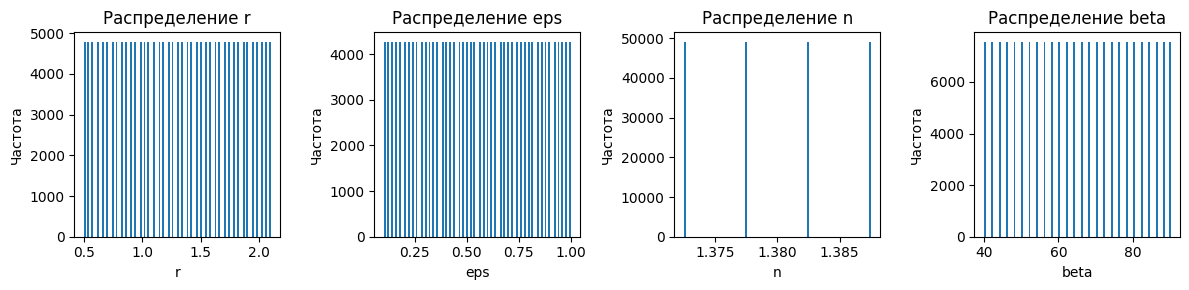

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Построение графиков для каждой колонки
axes[0].hist(df_th['r'], bins=100)
axes[0].set_xlabel('r')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение r')

axes[1].hist(df_th['eps'], bins=100)
axes[1].set_xlabel('eps')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение eps')

axes[2].hist(df_th['n'], bins=100)
axes[2].set_xlabel('n')
axes[2].set_ylabel('Частота')
axes[2].set_title('Распределение n')

axes[3].hist(df_th['beta'], bins=100)
axes[3].set_xlabel('beta')
axes[3].set_ylabel('Частота')
axes[3].set_title('Распределение beta')

plt.tight_layout()  # Расстановка графиков без перекрытия
plt.show()


Считаем эксп данные

In [10]:
df_ex = pd.read_csv(r'c:\Users\trrak\OneDrive\Рабочий стол\platelets\project_FC\experimental_1_degree.csv', sep=';')
df_ex

,10,11,12,13,14,15,16,17,18,19,...,61,62,63,64,65,66,67,68,69,70
0,183.176875,166.478693,134.478772,116.654527,98.472286,78.717751,62.504292,57.866845,49.507113,45.329470,...,3.499498,1.986927,2.974273,1.984659,2.357138,0.593534,-0.434256,-0.257839,-1.024817,NaN
1,74.758799,72.793755,65.249161,66.274876,59.231701,61.344619,52.165751,44.154889,41.012489,34.339016,...,1.738917,1.372427,-0.090051,-0.439739,-0.253310,-0.232650,-1.538535,-0.431494,-0.606203,NaN
2,878.528295,608.147687,422.259021,284.829020,174.500711,104.376918,57.810083,37.118711,28.380340,28.736102,...,-0.362481,0.055591,0.368540,-0.222707,-0.043057,-0.447811,0.499172,0.157822,-0.622346,NaN
3,555.969393,431.583247,345.706680,280.833703,231.427627,179.745473,144.822840,124.502582,94.629270,74.394734,...,-1.668954,-1.835357,-2.323255,-1.719203,0.114578,0.697275,0.605574,0.077802,-2.068405,NaN
4,340.091255,268.053440,213.270653,170.341848,128.769485,95.481732,81.011077,53.541826,36.837450,25.841330,...,3.220378,3.556445,2.990620,-0.043619,0.694566,0.544178,0.696334,0.563298,0.477633,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17436,1377.752719,878.281592,546.089727,325.884113,165.992291,78.956887,35.885254,23.970854,26.161488,35.160410,...,0.232498,1.578530,0.033897,-0.162381,1.801963,0.118351,-0.490850,-0.073694,-0.446275,NaN
17437,415.114219,318.059332,250.199157,188.483128,143.479386,103.810106,70.562213,45.839290,26.346305,14.366995,...,-1.202254,-0.668185,-0.696129,-0.934378,-0.484446,-1.597745,-0.911980,-0.575020,-1.264613,NaN
17438,733.036042,478.025693,310.075502,203.592574,106.704587,61.882547,31.124881,23.998593,13.959039,14.616868,...,2.566404,1.094970,-0.177452,0.188462,0.431783,0.806426,0.431566,0.490124,0.228049,NaN
17439,629.617094,426.788555,301.349396,201.641640,127.522228,91.146601,49.339893,33.783408,25.810443,22.322559,...,-1.555994,-1.576180,-1.543946,-1.431338,-1.544538,-1.595316,-1.971180,-1.993319,-2.028271,NaN


In [11]:
# Вывод количества строк с пустыми значениями
rows_with_null = df_ex.isnull().any(axis=1).sum()

print("Общее количество строк с пустыми значениями:", rows_with_null)

Общее количество строк с пустыми значениями: 17441


In [12]:
df_ex = df_ex.drop('70', axis=1)

Деление теор данных

In [13]:
X = df_th.iloc[:, 4:]
y = df_th[['r', 'eps', 'n', 'beta']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42, shuffle=True)

In [14]:
y_train.shape

(192221, 4)

In [15]:
# Преобразование в массив
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

Деление эксп данных

In [16]:
X_th_array = df_th.iloc[:, 4:].values
y_th_array = df_th[['r', 'eps', 'n', 'beta']].values
X_exp_array = df_ex.values

Применение весовой функции на входные данные

In [17]:
def weight_formula(θ):
    return (1/θ)*np.exp(-2*(np.log(θ/54))**2)

θ = np.array(df_ex.columns, dtype='double')
weight = weight_formula(θ)

In [18]:
X_train_weighted = X_train_array * weight 
X_test_weighted = X_test_array * weight
X_th_weighted = X_th_array * weight
X_exp_weighted = X_exp_array * weight

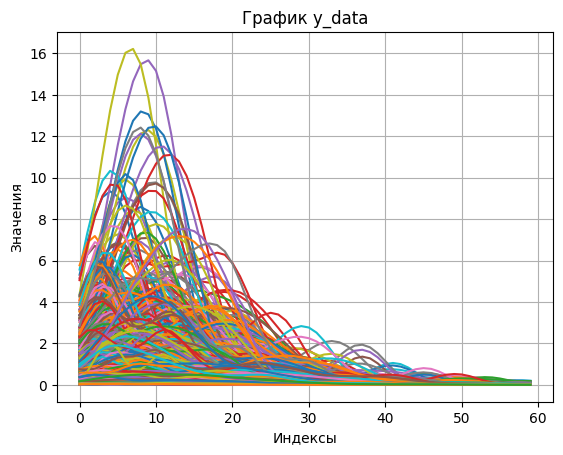

In [19]:
plt.plot(X_test_weighted.T)
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.title('График y_data')
plt.grid(True)
plt.show()

Метод alg_search теор

In [20]:
y_test_array

array([[ 1.89999998,  0.89999998,  1.37249994, 78.        ],
       [ 1.34000003,  0.36000001,  1.38750005, 50.        ],
       [ 0.74000001,  0.88      ,  1.37750006, 46.        ],
       ...,
       [ 1.17999995,  0.86000001,  1.37750006, 66.        ],
       [ 1.41999996,  0.22      ,  1.37750006, 42.        ],
       [ 0.94      ,  0.41999999,  1.38750005, 68.        ]])

In [21]:
X_test_weighted.shape

(3923, 60)

In [22]:
tree = KDTree(X_train_weighted, leaf_size=10)  
time_one = time.time()
s = pickle.dumps(tree)   
tree_copy = pickle.loads(s)  
dist, ind = tree_copy.query(X_test_weighted, k=1)
time_two = time.time()

In [23]:
# Время выполнения одной строки
(time_two - time_one) / len(X_test_weighted)

0.00015095208270374136

In [30]:
ind

array([[188328],
       [ 73990],
       [101594],
       ...,
       [154770],
       [ 11372],
       [187164]], dtype=int64)

In [24]:
result_array = y_train.values[ind[:, 0]]

In [25]:
result_array

array([[ 1.89999998,  0.89999998,  1.37249994, 80.        ],
       [ 1.38      ,  0.40000001,  1.38250005, 50.        ],
       [ 0.74000001,  0.89999998,  1.37750006, 44.        ],
       ...,
       [ 1.17999995,  0.88      ,  1.37750006, 68.        ],
       [ 1.38      ,  0.2       ,  1.38250005, 42.        ],
       [ 1.01999998,  0.38      ,  1.38250005, 68.        ]])

In [26]:
result_array.shape

(3923, 4)

In [27]:
y_test_array.shape

(3923, 4)

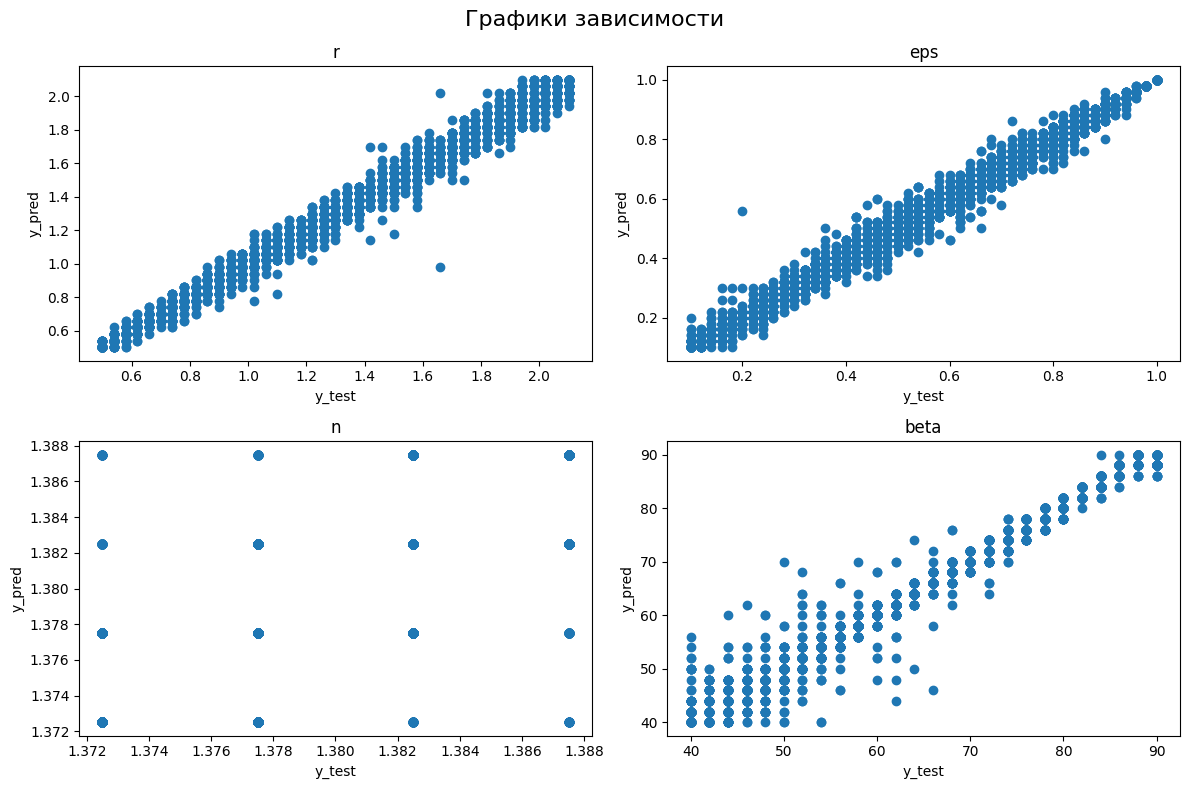

In [29]:
# Задаем названия осей и заголовок графика
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Графики зависимости", fontsize=16)

# Заголовки и массивы данных для построения графиков
titles = ["r", "eps", "n", "beta"]
data_arrays = [y_test_array[:, i] for i in range(4)]

# Создаем графики
for i, ax in enumerate(axs.flat):
    ax.plot(data_arrays[i], result_array[:, i], 'o')
    ax.set_xlabel("y_test")
    ax.set_ylabel("y_pred")
    ax.set_title(titles[i])

# Отобразить графики
plt.tight_layout()
plt.show()

Метод alg_search эксп

In [31]:
tree = KDTree(X_th_weighted, leaf_size=10)  
time_one = time.time()
s = pickle.dumps(tree)   
tree_copy = pickle.loads(s)  
dist, ind = tree_copy.query(X_exp_weighted, k=1)
time_two = time.time()

In [32]:
# Время выполнения одной строки
(time_two - time_one) / len(X_test_weighted)

0.006562870131625589

In [43]:
ind.shape

(17441, 1)

In [42]:
result_array = y.values[ind[:, 0]]

In [40]:
result_array.shape

(17441, 4)

Метод bd_search теор

In [45]:
# Создание пустого массива нужной длины для сохранения результатов
# rmse_results = np.zeros(X_test_weighted.shape[0])
index_bd_th = np.zeros(X_test_weighted.shape[0])

# Проход по каждой строке в X_test_array
for i in tqdm(range(X_test_weighted.shape[0])):
    # Считывание всех RMSE для одной строки X_test_array по X_train_array 
    # Нахождение минимального RMSE и соответствующего индекса для каждой строки X_test_array 
    rmse = np.sqrt(np.mean(np.square(X_train_weighted - X_test_weighted[i, :]), axis=1))
    min_rmse = np.min(rmse)
    min_index = np.argmin(rmse)
    # Создание два массива под RMSE и индекс
    # rmse_results[i] = min_rmse
    index_bd_th[i] = min_index

100%|██████████| 3923/3923 [03:55<00:00, 16.67it/s]


In [36]:
index_bd_th = np.array(index_bd_th)

In [ ]:
np.savetxt(r'C:\Users\trrak\OneDrive\Рабочий стол\InvBloodSolver\bd_search_files\index_exp.txt', index_results, fmt='%i')

In [44]:
index_bd_th.shape

NameError: name 'index_bd_th' is not defined

Метод bd_search эксп

In [38]:
# Создание пустого массива нужной длины для сохранения результатов
# rmse_results = np.zeros(X_exp_weighted.shape[0])
index_bd_exp = np.zeros(X_exp_weighted.shape[0])

# Проход по каждой строке в X_test_array
for i in tqdm(range(X_exp_weighted.shape[0])):
    # Считывание всех RMSE для одной строки X_test_array по X_train_array 
    # Нахождение минимального RMSE и соответствующего индекса для каждой строки X_test_array 
    rmse = np.sqrt(np.mean(np.square(X_th_weighted - X_exp_weighted[i, :]), axis=1))
    min_rmse = np.min(rmse)
    min_index = np.argmin(rmse)
    # Создание два массива под RMSE и индекс
    # rmse_results[i] = min_rmse
    index_bd_exp[i] = min_index

100%|██████████| 17441/17441 [16:29<00:00, 17.62it/s]


In [39]:
index_bd_exp = np.array(index_bd_exp)

In [40]:
index_bd_exp.shape

(17441,)

Сравнение методов корр графиками

In [41]:
def regr_model_resume(_y_test, _y_pred, params = ['r','eps', 'n', 'beta'], _title = '___________'):
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    
    mse = mean_squared_error(_y_pred, _y_test, multioutput='raw_values',squared=False)
    mae = mean_absolute_error(_y_pred, _y_test, multioutput='raw_values')
    r2 = r2_score(_y_pred, _y_test, multioutput='raw_values')
    
    metrics= np.array([mae, mse, r2]).T
    metrics = np.around(metrics, 4)
    
    
    plt.figure(figsize=(20, 10))
    plt.suptitle('ghjkhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh')
    N = len(params)
    M = 2
    for i in range(N):

        plt.subplot(M, N, i + 1)
        plt.title("Корреляционный график")
        plt.xlabel(params[i] + ' Тестовые')
        plt.ylabel(params[i] + ' Предсказанные')
        plt.plot(_y_test[:, i], _y_pred[:, i], '.', alpha = 0.3)


    
    plt.subplot(2, 1, 2)
    ax = plt.gca() 
    fig = plt.gcf()
    
    ax.axis('off')
    table = plt.table(cellText=metrics, colLabels = ['mae', 'mse', 'r2'], rowLabels = params,loc='center', colWidths=[0.1]*3)
    table.set_fontsize(14)
    table.scale(1,2)
    
    
    plt.show()
    

In [49]:
y_test_array.shape

(3923, 4)

In [82]:
y_array = y.values
y_pred = y_array[index_alg_th]

In [48]:
y_pred.shape

(3923, 4)

In [74]:
y_pred

array([[ 0.74000001,  0.98000002,  1.38750005, 70.        ],
       [ 1.05999994,  0.44      ,  1.37750006, 90.        ],
       [ 1.82000005,  0.56      ,  1.38750005, 74.        ],
       ...,
       [ 0.98000002,  0.81999999,  1.37249994, 86.        ],
       [ 1.58000004,  0.14      ,  1.37750006, 70.        ],
       [ 1.94000006,  0.95999998,  1.38250005, 82.        ]])

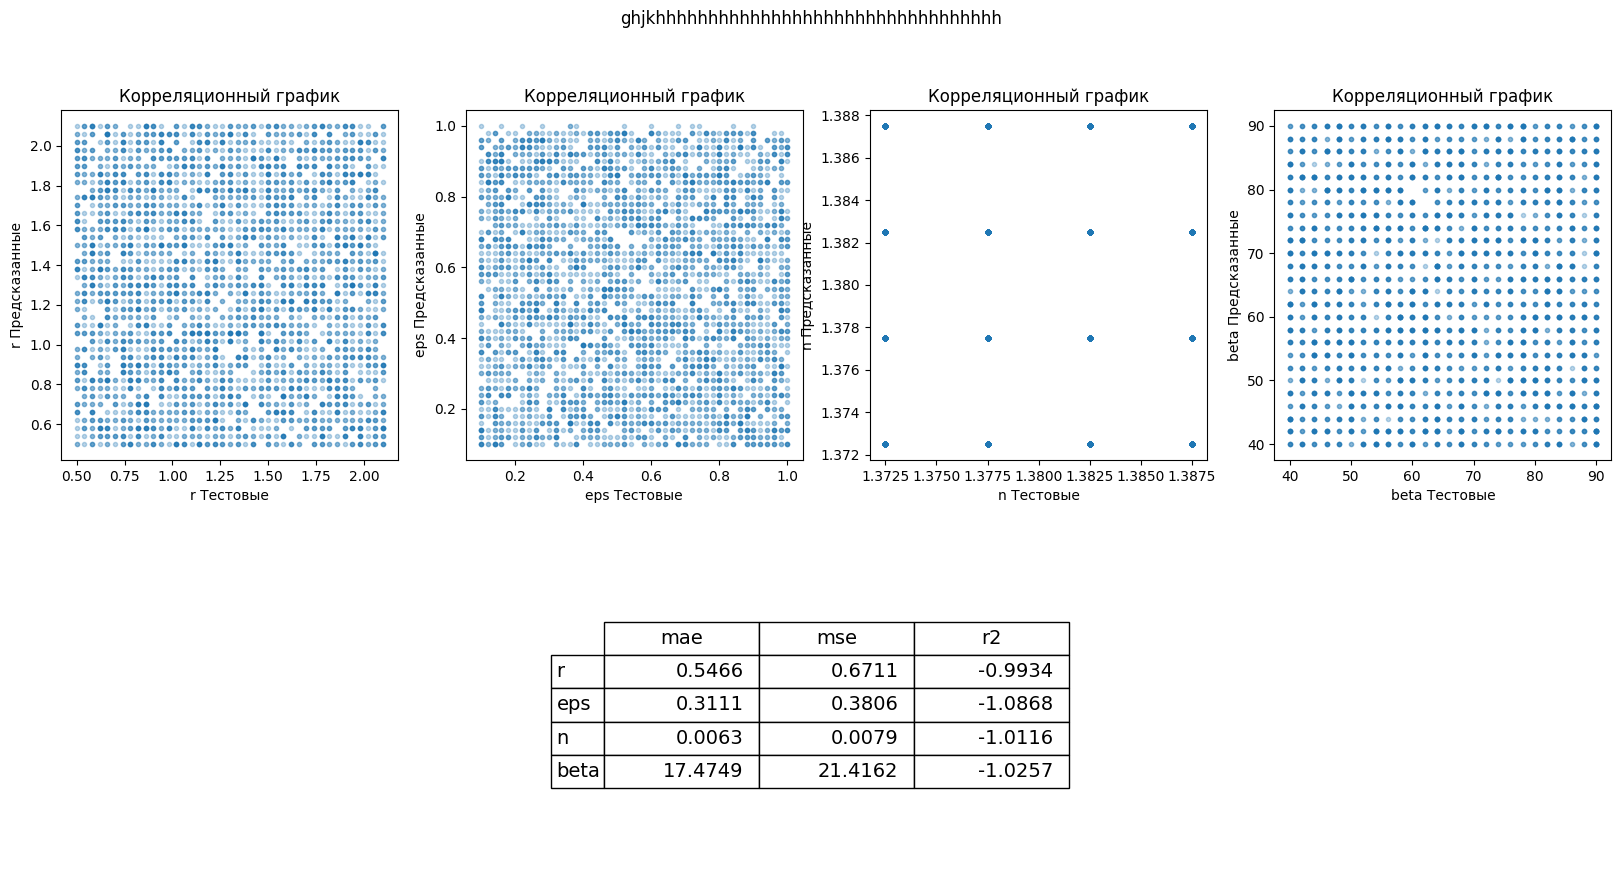

In [83]:
"regr_model_resume(y_test_array, y_pred)

In [ ]:
class HH(object):
    def fg(self, f):
        return 0
    self.gj =0
    